In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

### Reset Seed agar Reproducible

In [3]:
def reset_seeds(seed=42):
    import random as python_random
    import numpy as np
    import tensorflow as tf

    python_random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

### Variasi 1

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
reset_seeds()
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.3509 - loss: 1.7769 - val_accuracy: 0.5587 - val_loss: 1.2614
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5616 - loss: 1.2506 - val_accuracy: 0.6253 - val_loss: 1.0980
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6178 - loss: 1.0978 - val_accuracy: 0.6483 - val_loss: 1.0334
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6509 - loss: 1.0079 - val_accuracy: 0.6621 - val_loss: 1.0005
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6778 - loss: 0.9386 - val_accuracy: 0.6684 - val_loss: 0.9903
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6975 - loss: 0.8807 - val_accuracy: 0.6709 - val_loss: 0.9805
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7156 - loss: 0.8303 - val_accuracy: 0.6713 - val_loss: 0.9788
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7305 - loss: 0.7873 - val_accura

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 5 x 5 dan aktivasi relu<br/>
- filter 64 dengan ukuran 5 x 5 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
reset_seeds()
model_2 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3181 - loss: 1.8418 - val_accuracy: 0.5165 - val_loss: 1.3466
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5266 - loss: 1.3277 - val_accuracy: 0.5756 - val_loss: 1.1945
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5896 - loss: 1.1721 - val_accuracy: 0.6095 - val_loss: 1.1246
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6297 - loss: 1.0643 - val_accuracy: 0.6341 - val_loss: 1.0682
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6595 - loss: 0.9843 - val_accuracy: 0.6396 - val_loss: 1.0481
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6849 - loss: 0.9193 - val_accuracy: 0.6448 - val_loss: 1.0363
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7008 - loss: 0.8671 - val_accuracy: 0.6590 - val_loss: 1.0034
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7153 - loss: 0.8214 - val_accu

### Variasi 3

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 7 x 7 dan aktivasi relu<br/>
- filter 64 dengan ukuran 7 x 7 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [6]:
reset_seeds()
model_3 = Sequential([
    Conv2D(32, (7, 7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (7, 7), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2719 - loss: 1.9603 - val_accuracy: 0.4590 - val_loss: 1.4910
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4558 - loss: 1.4954 - val_accuracy: 0.5029 - val_loss: 1.3695
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5044 - loss: 1.3734 - val_accuracy: 0.5172 - val_loss: 1.3265
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5406 - loss: 1.2923 - val_accuracy: 0.5292 - val_loss: 1.3086
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5627 - loss: 1.2293 - val_accuracy: 0.5421 - val_loss: 1.2864
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5828 - loss: 1.1812 - val_accuracy: 0.5553 - val_loss: 1.2689
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5966 - loss: 1.1380 - val_accuracy: 0.5580 - val_loss: 1.2536
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6095 - loss: 1.0986 - val_accu

In [7]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1000
           1       0.79      0.82      0.80      1000
           2       0.60      0.56      0.58      1000
           3       0.46      0.55      0.50      1000
           4       0.62      0.64      0.63      1000
           5       0.58      0.58      0.58      1000
           6       0.81      0.71      0.76      1000
           7       0.71      0.73      0.72      1000
           8       0.82      0.68      0.74      1000
           9       0.87      0.64      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000

Macro F1-score: 0.6756


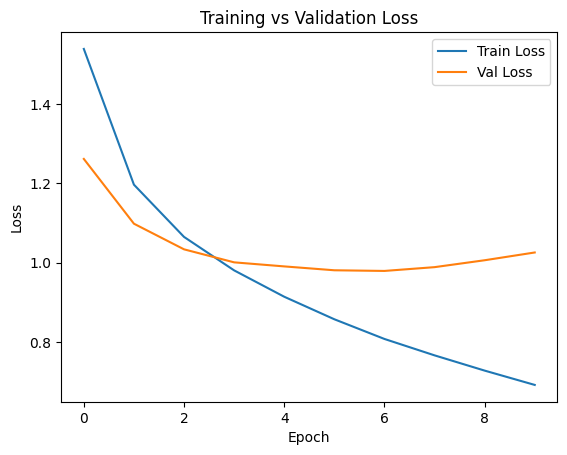

0.675633898580501

In [8]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.79      0.78      0.79      1000
           2       0.58      0.52      0.55      1000
           3       0.51      0.43      0.47      1000
           4       0.57      0.59      0.58      1000
           5       0.69      0.42      0.52      1000
           6       0.83      0.61      0.71      1000
           7       0.53      0.84      0.65      1000
           8       0.65      0.88      0.75      1000
           9       0.85      0.67      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000

Macro F1-score: 0.6468


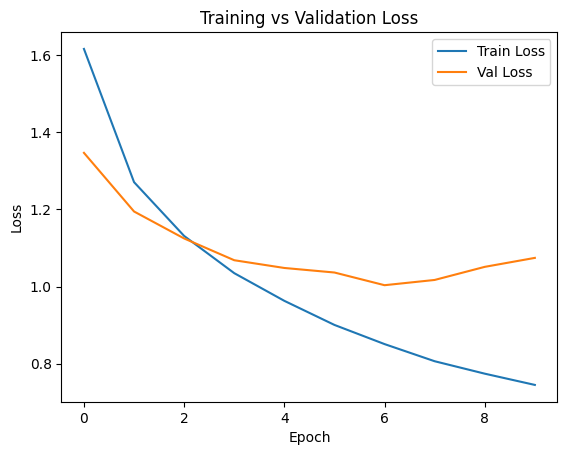

0.6468345529777344

In [9]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      1000
           1       0.63      0.79      0.70      1000
           2       0.46      0.47      0.47      1000
           3       0.43      0.35      0.39      1000
           4       0.52      0.43      0.47      1000
           5       0.54      0.39      0.46      1000
           6       0.70      0.62      0.66      1000
           7       0.58      0.71      0.64      1000
           8       0.64      0.71      0.68      1000
           9       0.71      0.51      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000

Macro F1-score: 0.5673


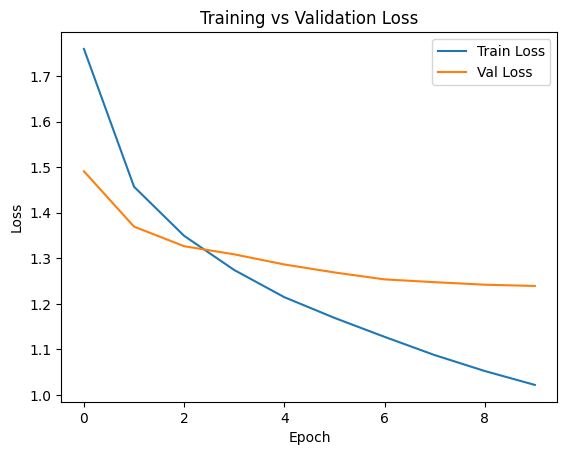

0.5673111286549934

In [10]:
evaluate_model(model_3, x_test, y_test, history_3)